# AML Final Project
submitted by  Dileep Kumar Pasala (811350727)
## Object Detection Analysis using Recent computer Vision Algorithms like YOLO & DETR.

***Mount Drive and create a clean drone_dataset folder***

In [1]:
from google.colab import drive
import os

#Mounting Drive
drive.mount('/content/drive')

#Creating a clean project folder for datasets
base_dir = "/content/drive/MyDrive/drone_datasets"
os.makedirs(base_dir, exist_ok=True)

print("Drive mounted. Current MyDrive contents:")
print(os.listdir("/content/drive/MyDrive"))

print("\nOur dataset folder path:")
print(base_dir)
print("Contents of drone_datasets:", os.listdir(base_dir))


Mounted at /content/drive
Drive mounted. Current MyDrive contents:
['Colab Notebooks', 'drone_datasets']

Our dataset folder path:
/content/drive/MyDrive/drone_datasets
Contents of drone_datasets: []


***Uploading the Roboflow dataset zip into drone_datasets through Colab***

In [2]:
import os

base_dir = "/content/drive/MyDrive/drone_datasets"
print("Contents of", base_dir, ":")
print(os.listdir(base_dir))


Contents of /content/drive/MyDrive/drone_datasets :
['roboflow_drone_20k.zip']


***Unzip the data set to /content/roboflow_drone_20k and inspecting folders***

In [3]:
import os
import shutil

zip_path = "/content/drive/MyDrive/drone_datasets/roboflow_drone_20k.zip"
target_dir = "/content/roboflow_drone_20k"

print("Zip path exists?", os.path.exists(zip_path), "->", zip_path)

#Clean any old local folder
if os.path.exists(target_dir):
    print("Removing old local folder:", target_dir)
    shutil.rmtree(target_dir)

#Unzip from Drive to local /content
!unzip -q "/content/drive/MyDrive/drone_datasets/roboflow_drone_20k.zip" -d "/content/roboflow_drone_20k"

#Inspect the top-level structure
print("\nAfter unzip, contents of", target_dir, ":")
print(os.listdir(target_dir))

print("\nDetailed view:")
for root, dirs, files in os.walk(target_dir):
    print("📂", root)
    if dirs:
        print("  subdirs:", dirs)
    if files:
        print("  files (first 10):", files[:10])
    print("--------------")


Zip path exists? True -> /content/drive/MyDrive/drone_datasets/roboflow_drone_20k.zip

After unzip, contents of /content/roboflow_drone_20k :
['valid', 'train', 'data.yaml', 'test', 'README.dataset.txt', 'README.roboflow.txt']

Detailed view:
📂 /content/roboflow_drone_20k
  subdirs: ['valid', 'train', 'test']
  files (first 10): ['data.yaml', 'README.dataset.txt', 'README.roboflow.txt']
--------------
📂 /content/roboflow_drone_20k/valid
  subdirs: ['labels', 'images']
--------------
📂 /content/roboflow_drone_20k/valid/labels
  files (first 10): ['1-359-_jpeg_jpg.rf.78ed7a44cbfe248d5be40e7f4cab09e1.txt', '1131_jpg.rf.a8dddec389a6a3d3072d43f6c1c2d7e9.txt', '0234_jpg.rf.fb1de6a007bff47e2f2b61f51ea05c46.txt', '1645_jpg.rf.7cdc7a5a754a257628e5876df400ac8b.txt', '1-220-_jpeg.rf.d6b0beed63bcdefe055a162e12828389.txt', '2693_jpg.rf.b13ea6322d45f9928683b515a0a502ea.txt', 'pic_338_jpg.rf.158f720d9c323011567ced716e8e0001.txt', 'tello_173_jpeg.rf.ed326930b2930082a0435a6488040cd9.txt', 'video17_993_

***Inspecting the new data.yaml***

In [4]:
import os

data_yaml_path = "/content/roboflow_drone_20k/data.yaml"
print("data.yaml path exists?", os.path.exists(data_yaml_path))

with open(data_yaml_path, "r") as f:
    content = f.read()

print("\n===== data.yaml =====")
print(content)
print("=====================")


data.yaml path exists? True

===== data.yaml =====
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['drone']

roboflow:
  workspace: tracker-qjlj1
  project: drones_new
  version: 4
  license: CC BY 4.0
  url: https://universe.roboflow.com/tracker-qjlj1/drones_new/dataset/4


***Counting images & labels for each split (train / valid / test)***

In [5]:
import os

base_dir = "/content/roboflow_drone_20k"

splits = ["train", "valid", "test"]

for split in splits:
    img_dir = os.path.join(base_dir, split, "images")
    lbl_dir = os.path.join(base_dir, split, "labels")

    print(f"\n=== {split.upper()} SPLIT ===")
    print("Image dir:", img_dir, "exists?", os.path.exists(img_dir))
    print("Label dir:", lbl_dir, "exists?", os.path.exists(lbl_dir))

    if not (os.path.exists(img_dir) and os.path.exists(lbl_dir)):
        continue  #skips counts if dirs missing

    #list images and labels
    img_files = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    lbl_files = [f for f in os.listdir(lbl_dir) if f.lower().endswith(".txt")]

    print("Number of images:", len(img_files))
    print("Number of labels:", len(lbl_files))

    #Check for images without labels
    missing_labels = []
    for img in img_files:
        stem = os.path.splitext(img)[0]
        lbl_path = os.path.join(lbl_dir, stem + ".txt")
        if not os.path.exists(lbl_path):
            missing_labels.append(img)

    print("Images without matching label:", len(missing_labels))
    if missing_labels[:5]:
        print("  First few without labels:", missing_labels[:5])



=== TRAIN SPLIT ===
Image dir: /content/roboflow_drone_20k/train/images exists? True
Label dir: /content/roboflow_drone_20k/train/labels exists? True
Number of images: 20256
Number of labels: 20256
Images without matching label: 0

=== VALID SPLIT ===
Image dir: /content/roboflow_drone_20k/valid/images exists? True
Label dir: /content/roboflow_drone_20k/valid/labels exists? True
Number of images: 1679
Number of labels: 1679
Images without matching label: 0

=== TEST SPLIT ===
Image dir: /content/roboflow_drone_20k/test/images exists? True
Label dir: /content/roboflow_drone_20k/test/labels exists? True
Number of images: 1063
Number of labels: 1063
Images without matching label: 0


***Creating a clean data_experiment.yaml for YOLO***

In [6]:
import textwrap

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

yaml_content = textwrap.dedent(f"""
path: {base_dir}
train: train/images
val: valid/images
test: test/images

nc: 1
names: ['drone']
""").strip() + "\n"

with open(data_experiment_path, "w") as f:
    f.write(yaml_content)

print("Wrote data_experiment.yaml to:", data_experiment_path)
print("\n===== data_experiment.yaml =====")
print(yaml_content)
print("================================")


Wrote data_experiment.yaml to: /content/roboflow_drone_20k/data_experiment.yaml

===== data_experiment.yaml =====
path: /content/roboflow_drone_20k
train: train/images
val: valid/images
test: test/images

nc: 1
names: ['drone']



**Installing Ultralytics**

In [7]:
#Install & import Ultralytics
# Install Ultralytics YOLO
!pip install -q ultralytics

from ultralytics import YOLO
import ultralytics

print("Ultralytics imported successfully.")
print("Ultralytics version:", ultralytics.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics imported successfully.
Ultralytics version: 8.3.233


In [8]:
#Quick manual check: open one image + label pair
import os
import random

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

print("data_experiment.yaml exists?", os.path.exists(data_experiment_path), "->", data_experiment_path)

train_img_dir = os.path.join(base_dir, "train", "images")
train_lbl_dir = os.path.join(base_dir, "train", "labels")

#pick a random image
img_files = [f for f in os.listdir(train_img_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
print("Total train images:", len(img_files))

sample_img = random.choice(img_files)
stem = os.path.splitext(sample_img)[0]
sample_lbl = stem + ".txt"

img_path = os.path.join(train_img_dir, sample_img)
lbl_path = os.path.join(train_lbl_dir, sample_lbl)

print("\nSample image:", img_path)
print("Sample label:", lbl_path, "exists?", os.path.exists(lbl_path))

#print label file contents
if os.path.exists(lbl_path):
    with open(lbl_path, "r") as f:
        lines = f.read().strip().splitlines()
    print("\nLabel file contents (up to 5 lines):")
    for line in lines[:5]:
        print("  ", line)


data_experiment.yaml exists? True -> /content/roboflow_drone_20k/data_experiment.yaml
Total train images: 20256

Sample image: /content/roboflow_drone_20k/train/images/320_JPEG_jpg.rf.8c4aaa72cb698476e039d8e14add6715.jpg
Sample label: /content/roboflow_drone_20k/train/labels/320_JPEG_jpg.rf.8c4aaa72cb698476e039d8e14add6715.txt exists? True

Label file contents (up to 5 lines):
   0 0.8296875 0.27823691460055094 0.1234375 0.17079889807162535


In [1]:
from google.colab import drive
import os
import torch

#Check GPU availability
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

#Mount Drive
drive.mount('/content/drive')

#Confirm dataset zip in Drive
base_dir = "/content/drive/MyDrive/drone_datasets"
print("\nContents of", base_dir, ":")
print(os.listdir(base_dir))

zip_path = os.path.join(base_dir, "roboflow_drone_20k.zip")
print("\nZip path exists?", os.path.exists(zip_path), "->", zip_path)


CUDA available: True
GPU name: NVIDIA A100-SXM4-80GB
Mounted at /content/drive

Contents of /content/drive/MyDrive/drone_datasets :
['roboflow_drone_20k.zip']

Zip path exists? True -> /content/drive/MyDrive/drone_datasets/roboflow_drone_20k.zip


***Unzipping dataset to /content/roboflow_drone_20k***

In [2]:
import os
import shutil

zip_path = "/content/drive/MyDrive/drone_datasets/roboflow_drone_20k.zip"
target_dir = "/content/roboflow_drone_20k"

print("Zip path exists?", os.path.exists(zip_path), "->", zip_path)

#Clean old local folder
if os.path.exists(target_dir):
    print("Removing old local folder:", target_dir)
    shutil.rmtree(target_dir)

#Unzip from Drive to local /content
!unzip -q "/content/drive/MyDrive/drone_datasets/roboflow_drone_20k.zip" -d "/content/roboflow_drone_20k"


print("\nAfter unzip, contents of", target_dir, ":")
print(os.listdir(target_dir))

#Check each split has images + labels
for split in ["train", "valid", "test"]:
    split_dir = os.path.join(target_dir, split)
    img_dir = os.path.join(split_dir, "images")
    lbl_dir = os.path.join(split_dir, "labels")
    print(f"\n=== {split.upper()} ===")
    print("Split dir exists?", os.path.exists(split_dir), "->", split_dir)
    print("  images dir exists?", os.path.exists(img_dir), "->", img_dir)
    print("  labels dir exists?", os.path.exists(lbl_dir), "->", lbl_dir)


Zip path exists? True -> /content/drive/MyDrive/drone_datasets/roboflow_drone_20k.zip

After unzip, contents of /content/roboflow_drone_20k :
['README.dataset.txt', 'test', 'valid', 'data.yaml', 'train', 'README.roboflow.txt']

=== TRAIN ===
Split dir exists? True -> /content/roboflow_drone_20k/train
  images dir exists? True -> /content/roboflow_drone_20k/train/images
  labels dir exists? True -> /content/roboflow_drone_20k/train/labels

=== VALID ===
Split dir exists? True -> /content/roboflow_drone_20k/valid
  images dir exists? True -> /content/roboflow_drone_20k/valid/images
  labels dir exists? True -> /content/roboflow_drone_20k/valid/labels

=== TEST ===
Split dir exists? True -> /content/roboflow_drone_20k/test
  images dir exists? True -> /content/roboflow_drone_20k/test/images
  labels dir exists? True -> /content/roboflow_drone_20k/test/labels


***Recreating data_experiment.yaml in /content/roboflow_drone_20k***

In [3]:
import os
import textwrap

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

yaml_content = textwrap.dedent(f"""
path: {base_dir}
train: train/images
val: valid/images
test: test/images

nc: 1
names: ['drone']
""").strip() + "\n"

with open(data_experiment_path, "w") as f:
    f.write(yaml_content)

print("Wrote data_experiment.yaml to:", data_experiment_path)
print("\n===== data_experiment.yaml =====")
print(yaml_content)
print("================================")

print("\nFile exists?", os.path.exists(data_experiment_path))


Wrote data_experiment.yaml to: /content/roboflow_drone_20k/data_experiment.yaml

===== data_experiment.yaml =====
path: /content/roboflow_drone_20k
train: train/images
val: valid/images
test: test/images

nc: 1
names: ['drone']


File exists? True


*Install Ultralytics on GPU runtime and loading YOLOv8n*

In [4]:
#Install Ultralytics YOLO
!pip install -q ultralytics

from ultralytics import YOLO
import ultralytics
import torch

print("Ultralytics version:", ultralytics.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))

#Path to data config
data_experiment_path = "/content/roboflow_drone_20k/data_experiment.yaml"
print("\ndata_experiment.yaml exists?", torch.cuda.is_available() and True, "->", data_experiment_path)

#Load YOLOv8n pretrained model
model = YOLO("yolov8n.pt")
print("\nLoaded model:", model.model.__class__.__name__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics version: 8.3.233
CUDA available: True
GPU: NVIDIA A100-SXM4-80GB

data_experiment.yaml exists? True -> /content/roboflow_drone_20k/data_experiment.yaml

Loaded model: DetectionModel


### **Training YOLOv8n baseline model**

In [5]:
from ultralytics import YOLO

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

#Reload the model
model = YOLO("yolov8n.pt")

results = model.train(
    data=data_experiment_path,
    epochs=20,          # baseline;
    imgsz=640,
    batch=16,
    project="/content/yolo_drone_runs",
    name="y8n_baseline",
    pretrained=True,
    device=0,
    workers=2,
    patience=5,         # early stopping, helps save compute if it plateaus
    cos_lr=True         # smoother learning rate schedule
)

print("\nTraining finished. Results saved in /content/yolo_drone_runs/y8n_baseline")


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/roboflow_drone_20k/data_experiment.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=y8n_baseline, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, p

***Moving YOLOv8n results to Google Drive***

In [6]:
import os
import shutil

#Ultralytics saves the run
run_dir = "/content/yolo_drone_runs/y8n_baseline"

#creates a folder in Drive to store this experiment
drive_base = "/content/drive/MyDrive/drone_project"
drive_exp_dir = os.path.join(drive_base, "y8n_baseline")

os.makedirs(drive_exp_dir, exist_ok=True)

print("Run directory:", run_dir)
print("Drive experiment directory:", drive_exp_dir)

#List of files to copy
files_to_copy = [
    "weights/best.pt",
    "weights/last.pt",
    "results.csv",
    "results.png",
    "confusion_matrix.png",
    "PR_curve.png",
    "F1_curve.png",
    "labels_correlogram.jpg"
]

for rel_path in files_to_copy:
    src = os.path.join(run_dir, rel_path)
    if os.path.exists(src):
        dst = os.path.join(drive_exp_dir, os.path.basename(src))
        shutil.copy(src, dst)
        print(f"Copied {src} -> {dst}")
    else:
        print(f"Not found (skipped): {src}")

print("\nFiles now in Drive experiment folder:")
print(os.listdir(drive_exp_dir))


Run directory: /content/yolo_drone_runs/y8n_baseline
Drive experiment directory: /content/drive/MyDrive/drone_project/y8n_baseline
Copied /content/yolo_drone_runs/y8n_baseline/weights/best.pt -> /content/drive/MyDrive/drone_project/y8n_baseline/best.pt
Copied /content/yolo_drone_runs/y8n_baseline/weights/last.pt -> /content/drive/MyDrive/drone_project/y8n_baseline/last.pt
Copied /content/yolo_drone_runs/y8n_baseline/results.csv -> /content/drive/MyDrive/drone_project/y8n_baseline/results.csv
Copied /content/yolo_drone_runs/y8n_baseline/results.png -> /content/drive/MyDrive/drone_project/y8n_baseline/results.png
Copied /content/yolo_drone_runs/y8n_baseline/confusion_matrix.png -> /content/drive/MyDrive/drone_project/y8n_baseline/confusion_matrix.png
Not found (skipped): /content/yolo_drone_runs/y8n_baseline/PR_curve.png
Not found (skipped): /content/yolo_drone_runs/y8n_baseline/F1_curve.png
Not found (skipped): /content/yolo_drone_runs/y8n_baseline/labels_correlogram.jpg

Files now in D

***Evaluating YOLOv8n on the test set***

In [7]:
#Evaluate on the test split
from ultralytics import YOLO
import os

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

#Use the best model
run_dir = "/content/yolo_drone_runs/y8n_baseline"
best_weights = os.path.join(run_dir, "weights", "best.pt")

print("Best weights path exists?", os.path.exists(best_weights), "->", best_weights)

model = YOLO(best_weights)

# Evaluate on the test split defined in data_experiment.yaml
metrics = model.val(
    data=data_experiment_path,
    split="test",   # use the test set
    imgsz=640,
    batch=32,
    device=0
)

print("\nValidation on TEST split complete.")
print("mAP50:", metrics.box.map50)
print("mAP50-95:", metrics.box.map)
print("Precision:", metrics.box.mp)
print("Recall:", metrics.box.mr)


Best weights path exists? True -> /content/yolo_drone_runs/y8n_baseline/weights/best.pt
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 910.4±321.5 MB/s, size: 32.8 KB)
val: Scanning /content/roboflow_drone_20k/test/labels... 1063 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1063/1063 1.6Kit/s 0.7s
val: New cache created: /content/roboflow_drone_20k/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 34/34 6.3it/s 5.4s
                   all       1063       1124      0.931       0.93      0.958      0.656
Speed: 0.7ms preprocess, 1.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/runs/detect/val

Validation on TEST split complete.
mAP50: 0.9575056386822426
mAP50-95: 0.6564146822987531
Precision: 0.9

In [8]:
#Run predictions on a few random test images and save to Drive
import random
import shutil

#Paths
test_img_dir = os.path.join(base_dir, "test", "images")
test_images = [os.path.join(test_img_dir, f)
               for f in os.listdir(test_img_dir)
               if f.lower().endswith((".jpg", ".jpeg", ".png"))]

print("Total test images:", len(test_images))

#Pick a few random images
random.seed(42)
sample_imgs = random.sample(test_images, 5)
print("Sample images:")
for p in sample_imgs:
    print(" ", p)

#Run prediction
pred_results = model.predict(
    source=sample_imgs,
    imgsz=640,
    conf=0.25,
    device=0,
    save=True
)

#Locate the last prediction directory
pred_root = model.predictor.save_dir  # Ultralytics sets this
print("\nPredictions saved in:", pred_root)

#Copy them to Drive for safekeeping
drive_vis_dir = "/content/drive/MyDrive/drone_project/y8n_baseline_preds"
os.makedirs(drive_vis_dir, exist_ok=True)

for f in os.listdir(pred_root):
    src = os.path.join(pred_root, f)
    if os.path.isfile(src):
        dst = os.path.join(drive_vis_dir, f)
        shutil.copy(src, dst)
        print(f"Copied {src} -> {dst}")

print("\nVisualization files now in Drive:", drive_vis_dir)


Total test images: 1063
Sample images:
  /content/roboflow_drone_20k/test/images/11-44-_jpeg_jpg.rf.a05901acf23a6a08aed34685c9b6e12d.jpg
  /content/roboflow_drone_20k/test/images/1264_jpg.rf.1967cac4028bb93b690f7f481173e8fb.jpg
  /content/roboflow_drone_20k/test/images/video18_1106_JPEG_jpg.rf.4bb35db2f8f20010981e92b89cc3c085.jpg
  /content/roboflow_drone_20k/test/images/video18_602_JPEG_jpg.rf.6a92cf00037a100698b7744155e8d707.jpg
  /content/roboflow_drone_20k/test/images/320_JPEG.rf.240da01000eac46c2bb606666a7c4386.jpg

0: 640x640 1 drone, 13.1ms
1: 640x640 1 drone, 13.1ms
2: 640x640 2 drones, 13.1ms
3: 640x640 1 drone, 13.1ms
4: 640x640 1 drone, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict

Predictions saved in: /content/runs/detect/predict
Copied /content/runs/detect/predict/1264_jpg.rf.1967cac4028bb93b690f7f481173e8fb.jpg -> /content/drive/MyDrive/drone_project/y8n_baseline_pred

## **Train YOLOv8s Model2**

In [9]:
from ultralytics import YOLO

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

print("Using data config:", data_experiment_path)

#Load YOLOv8s pretrained model
model_s = YOLO("yolov8s.pt")

results_s = model_s.train(
    data=data_experiment_path,
    epochs=20,
    imgsz=640,
    batch=16,
    project="/content/yolo_drone_runs",
    name="y8s_model",
    pretrained=True,
    device=0,
    workers=2,
    patience=5,
    cos_lr=True
)

print("\nYOLOv8s training finished. Results saved in /content/yolo_drone_runs/y8s_model")


Using data config: /content/roboflow_drone_20k/data_experiment.yaml
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/roboflow_drone_20k/data_experiment.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=y8s_model, nbs=64, nms=False, opset=None,

***Move YOLOv8s results to Google Drive***

In [10]:
import os
import shutil

run_dir_s = "/content/yolo_drone_runs/y8s_model"

drive_base = "/content/drive/MyDrive/drone_project"
drive_exp_dir_s = os.path.join(drive_base, "y8s_model")

os.makedirs(drive_exp_dir_s, exist_ok=True)

print("Run directory (YOLOv8s):", run_dir_s)
print("Drive experiment directory (YOLOv8s):", drive_exp_dir_s)

files_to_copy = [
    "weights/best.pt",
    "weights/last.pt",
    "results.csv",
    "results.png",
    "confusion_matrix.png",
    "PR_curve.png",
    "F1_curve.png",
    "labels_correlogram.jpg"
]

for rel_path in files_to_copy:
    src = os.path.join(run_dir_s, rel_path)
    if os.path.exists(src):
        dst = os.path.join(drive_exp_dir_s, os.path.basename(src))
        shutil.copy(src, dst)
        print(f"Copied {src} -> {dst}")
    else:
        print(f"Not found (skipped): {src}")

print("\nFiles now in Drive YOLOv8s folder:")
print(os.listdir(drive_exp_dir_s))


Run directory (YOLOv8s): /content/yolo_drone_runs/y8s_model
Drive experiment directory (YOLOv8s): /content/drive/MyDrive/drone_project/y8s_model
Copied /content/yolo_drone_runs/y8s_model/weights/best.pt -> /content/drive/MyDrive/drone_project/y8s_model/best.pt
Copied /content/yolo_drone_runs/y8s_model/weights/last.pt -> /content/drive/MyDrive/drone_project/y8s_model/last.pt
Copied /content/yolo_drone_runs/y8s_model/results.csv -> /content/drive/MyDrive/drone_project/y8s_model/results.csv
Copied /content/yolo_drone_runs/y8s_model/results.png -> /content/drive/MyDrive/drone_project/y8s_model/results.png
Copied /content/yolo_drone_runs/y8s_model/confusion_matrix.png -> /content/drive/MyDrive/drone_project/y8s_model/confusion_matrix.png
Not found (skipped): /content/yolo_drone_runs/y8s_model/PR_curve.png
Not found (skipped): /content/yolo_drone_runs/y8s_model/F1_curve.png
Not found (skipped): /content/yolo_drone_runs/y8s_model/labels_correlogram.jpg

Files now in Drive YOLOv8s folder:
['be

***Evaluating YOLOv8s on the test data***

In [11]:
from ultralytics import YOLO
import os

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

run_dir_s = "/content/yolo_drone_runs/y8s_model"
best_weights_s = os.path.join(run_dir_s, "weights", "best.pt")

print("Best weights (YOLOv8s) exists?", os.path.exists(best_weights_s), "->", best_weights_s)

model_s = YOLO(best_weights_s)

metrics_s = model_s.val(
    data=data_experiment_path,
    split="test",
    imgsz=640,
    batch=32,
    device=0
)

print("\nYOLOv8s validation on TEST split complete.")
print("mAP50:", metrics_s.box.map50)
print("mAP50-95:", metrics_s.box.map)
print("Precision:", metrics_s.box.mp)
print("Recall:", metrics_s.box.mr)


Best weights (YOLOv8s) exists? True -> /content/yolo_drone_runs/y8s_model/weights/best.pt
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1279.0±447.5 MB/s, size: 47.7 KB)
val: Scanning /content/roboflow_drone_20k/test/labels.cache... 1063 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1063/1063 2.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 34/34 5.8it/s 5.8s
                   all       1063       1124      0.937      0.947      0.968      0.676
Speed: 0.8ms preprocess, 1.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/runs/detect/val2

YOLOv8s validation on TEST split complete.
mAP50: 0.967646054438019
mAP50-95: 0.6760903514951974
Precision: 0.9366664045684828
Recall: 0.9473643419533244


***Save YOLOv8s predictions***

In [12]:
import random
import shutil

test_img_dir = os.path.join(base_dir, "test", "images")
test_images = [os.path.join(test_img_dir, f)
               for f in os.listdir(test_img_dir)
               if f.lower().endswith((".jpg", ".jpeg", ".png"))]

print("Total test images:", len(test_images))

random.seed(123)
sample_imgs = random.sample(test_images, 5)
print("Sample images for YOLOv8s:")
for p in sample_imgs:
    print(" ", p)

pred_results_s = model_s.predict(
    source=sample_imgs,
    imgsz=640,
    conf=0.25,
    device=0,
    save=True
)

pred_root_s = model_s.predictor.save_dir
print("\nYOLOv8s predictions saved in:", pred_root_s)

drive_vis_dir_s = "/content/drive/MyDrive/drone_project/y8s_model_preds"
os.makedirs(drive_vis_dir_s, exist_ok=True)

for f in os.listdir(pred_root_s):
    src = os.path.join(pred_root_s, f)
    if os.path.isfile(src):
        dst = os.path.join(drive_vis_dir_s, f)
        shutil.copy(src, dst)
        print(f"Copied {src} -> {dst}")

print("\nVisualization files now in Drive:", drive_vis_dir_s)


Total test images: 1063
Sample images for YOLOv8s:
  /content/roboflow_drone_20k/test/images/4157_jpg.rf.7f29a3cf9afdd4d71527b69919878212.jpg
  /content/roboflow_drone_20k/test/images/video17_957_JPEG.rf.f84374b9dc89124568d0195cf2974584.jpg
  /content/roboflow_drone_20k/test/images/891_jpg.rf.313bb07a5839454cc5a7db685aa99cd3.jpg
  /content/roboflow_drone_20k/test/images/668_jpg.rf.77f4f9b32ddb3b6355e622b0c6df8acf.jpg
  /content/roboflow_drone_20k/test/images/2806_jpg.rf.2b45dc8857b69df0c17a7d4a0f02cabb.jpg

0: 640x640 1 drone, 11.9ms
1: 640x640 1 drone, 11.9ms
2: 640x640 1 drone, 11.9ms
3: 640x640 1 drone, 11.9ms
4: 640x640 1 drone, 11.9ms
Speed: 1.7ms preprocess, 11.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2

YOLOv8s predictions saved in: /content/runs/detect/predict2
Copied /content/runs/detect/predict2/4157_jpg.rf.7f29a3cf9afdd4d71527b69919878212.jpg -> /content/drive/MyDrive/drone_project/y8s_model_preds/4157_

### **Training RT-DETR-l model**

In [13]:
from ultralytics import YOLO
import os

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

print("Using data config:", data_experiment_path)

#Load RT-DETR large (transformer-based detector)
model_rtdetr = YOLO("rtdetr-l.pt")

results_rtdetr = model_rtdetr.train(
    data=data_experiment_path,
    epochs=15,
    imgsz=640,
    batch=16,
    project="/content/yolo_drone_runs",
    name="rtdetr_l_model",
    pretrained=True,
    device=0,
    workers=2,
    patience=5,           # early stopping
    cos_lr=True
)

print("\nRT-DETR-l training finished. Results saved in /content/yolo_drone_runs/rtdetr_l_model")


Using data config: /content/roboflow_drone_20k/data_experiment.yaml
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/roboflow_drone_20k/data_experiment.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rtdetr_l_model, nbs=64, nms=False, opset

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       1/15      12.2G     0.5939     0.8897     0.3539         36        640: 100% ━━━━━━━━━━━━ 1266/1266 2.6it/s 8:16
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 53/53 3.9it/s 13.7s
                   all       1679       1795      0.877      0.808      0.838      0.505

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       2/15        13G      0.611     0.4693     0.3113         32        640: 0% ──────────── 0/1266  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       2/15        13G     0.5755     0.6554      0.335         24        640: 100% ━━━━━━━━━━━━ 1266/1266 2.7it/s 7:46
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 53/53 5.8it/s 9.1s
                   all       1679       1795      0.829      0.777      0.822      0.487

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       3/15        13G     0.6709     0.6828     0.3344         26        640: 0% ──────────── 0/1266  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       3/15        13G     0.5676     0.6687     0.3303         28        640: 100% ━━━━━━━━━━━━ 1266/1266 2.8it/s 7:37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 53/53 5.9it/s 9.0s
                   all       1679       1795      0.749      0.792       0.79      0.484

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       4/15        13G     0.5539     0.7752     0.2884         38        640: 0% ──────────── 0/1266  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       4/15        13G        nan        nan        nan         27        640: 100% ━━━━━━━━━━━━ 1266/1266 2.8it/s 7:34
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 53/53 7.3it/s 7.3s
                   all       1679       1795          0          0          0          0

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       5/15        13G        nan        nan        nan         27        640: 0% ──────────── 0/1266  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       5/15        13G        nan        nan        nan         31        640: 100% ━━━━━━━━━━━━ 1266/1266 2.8it/s 7:29
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 53/53 7.3it/s 7.2s
                   all       1679       1795          0          0          0          0
WARNING ⚠️ Loss NaN/Inf detected (attempt 1/3), recovering from last.pt...


RuntimeError: Checkpoint /content/yolo_drone_runs/rtdetr_l_model/weights/last.pt is corrupted with NaN/Inf weights

Removing the corrupted run folder

In [14]:
import os
import shutil

bad_run_dir = "/content/yolo_drone_runs/rtdetr_l_model"

if os.path.exists(bad_run_dir):
    print("Removing corrupted run directory:", bad_run_dir)
    shutil.rmtree(bad_run_dir)
else:
    print("No old run dir found:", bad_run_dir)


Removing corrupted run directory: /content/yolo_drone_runs/rtdetr_l_model


***Re-train RT-DETR-l model***

In [15]:
from ultralytics import YOLO
import os

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

print("Using data config:", data_experiment_path)

#Fresh model load
model_rtdetr = YOLO("rtdetr-l.pt")

results_rtdetr = model_rtdetr.train(
    data=data_experiment_path,
    epochs=10,
    imgsz=640,
    batch=8,              # smaller batch to reduce instability
    lr0=0.0005,           # lower initial LR for stability
    project="/content/yolo_drone_runs",
    name="rtdetr_l_safe",
    pretrained=True,
    device=0,
    workers=2,
    patience=3,
    cos_lr=True
)

print("\nRT-DETR-l (safe settings) training finished. Results saved in /content/yolo_drone_runs/rtdetr_l_safe")


Using data config: /content/roboflow_drone_20k/data_experiment.yaml
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/roboflow_drone_20k/data_experiment.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rtdetr_l_safe, nbs=64, nms=False, opset

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       1/10      13.2G     0.5927      0.924     0.3837          8        640: 100% ━━━━━━━━━━━━ 2532/2532 3.0it/s 14:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 105/105 9.4it/s 11.2s
                   all       1679       1795      0.803      0.759      0.784      0.436

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       2/10      13.3G     0.5927     0.5988     0.3083          9        640: 0% ──────────── 0/2532  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       2/10      13.3G     0.6021     0.6417     0.3875          8        640: 100% ━━━━━━━━━━━━ 2532/2532 3.2it/s 13:14
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 105/105 9.6it/s 11.0s
                   all       1679       1795       0.74       0.76      0.724      0.404

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       3/10      13.3G       0.67      1.083     0.3882          8        640: 0% ──────────── 0/2532  0.3s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       3/10      13.3G     0.6222     0.7543     0.3901          8        640: 100% ━━━━━━━━━━━━ 2532/2532 3.2it/s 13:06
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 105/105 9.3it/s 11.3s
                   all       1679       1795       0.67      0.481      0.531      0.292

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       4/10      13.3G     0.6649     0.9871     0.3353          8        640: 0% ──────────── 0/2532  0.4s

/usr/local/lib/python3.12/dist-packages/torch/autograd/graph.py:841: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:157.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


       4/10      13.3G        nan        nan        nan          8        640: 100% ━━━━━━━━━━━━ 2532/2532 3.1it/s 13:25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 105/105 10.8it/s 9.7s
                   all       1679       1795          0          0          0          0
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

4 epochs completed in 0.909 hours.
Optimizer stripped from /content/yolo_drone_runs/rtdetr_l_safe/weights/last.pt, 66.2MB
Optimizer stripped from /content/yolo_drone_runs/rtdetr_l_safe/weights/best.pt, 66.2MB

Validating /content/yolo_drone_runs/rtdetr_l_safe/weights/best.pt...
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
rt-detr-l

***Move RT-DETR-l  model results to Google Drive***

In [16]:
import os
import shutil

run_dir_rtdetr = "/content/yolo_drone_runs/rtdetr_l_safe"

drive_base = "/content/drive/MyDrive/drone_project"
drive_exp_dir_rtdetr = os.path.join(drive_base, "rtdetr_l_safe")

os.makedirs(drive_exp_dir_rtdetr, exist_ok=True)

print("Run directory (RT-DETR-l):", run_dir_rtdetr)
print("Drive experiment directory (RT-DETR-l):", drive_exp_dir_rtdetr)

files_to_copy = [
    "weights/best.pt",
    "weights/last.pt",
    "results.csv",
    "results.png",
    "confusion_matrix.png",
    "PR_curve.png",
    "F1_curve.png",
    "labels_correlogram.jpg"
]

for rel_path in files_to_copy:
    src = os.path.join(run_dir_rtdetr, rel_path)
    if os.path.exists(src):
        dst = os.path.join(drive_exp_dir_rtdetr, os.path.basename(src))
        shutil.copy(src, dst)
        print(f"Copied {src} -> {dst}")
    else:
        print(f"Not found (skipped): {src}")

print("\nFiles now in Drive RT-DETR folder:")
print(os.listdir(drive_exp_dir_rtdetr))


Run directory (RT-DETR-l): /content/yolo_drone_runs/rtdetr_l_safe
Drive experiment directory (RT-DETR-l): /content/drive/MyDrive/drone_project/rtdetr_l_safe
Copied /content/yolo_drone_runs/rtdetr_l_safe/weights/best.pt -> /content/drive/MyDrive/drone_project/rtdetr_l_safe/best.pt
Copied /content/yolo_drone_runs/rtdetr_l_safe/weights/last.pt -> /content/drive/MyDrive/drone_project/rtdetr_l_safe/last.pt
Copied /content/yolo_drone_runs/rtdetr_l_safe/results.csv -> /content/drive/MyDrive/drone_project/rtdetr_l_safe/results.csv
Copied /content/yolo_drone_runs/rtdetr_l_safe/results.png -> /content/drive/MyDrive/drone_project/rtdetr_l_safe/results.png
Copied /content/yolo_drone_runs/rtdetr_l_safe/confusion_matrix.png -> /content/drive/MyDrive/drone_project/rtdetr_l_safe/confusion_matrix.png
Not found (skipped): /content/yolo_drone_runs/rtdetr_l_safe/PR_curve.png
Not found (skipped): /content/yolo_drone_runs/rtdetr_l_safe/F1_curve.png
Not found (skipped): /content/yolo_drone_runs/rtdetr_l_safe

***Evaluating RT-DETR-l on the Test data***

In [17]:
from ultralytics import YOLO
import os

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

run_dir_rtdetr = "/content/yolo_drone_runs/rtdetr_l_safe"
best_weights_rtdetr = os.path.join(run_dir_rtdetr, "weights", "best.pt")

print("Best weights (RT-DETR-l) exists?", os.path.exists(best_weights_rtdetr), "->", best_weights_rtdetr)

model_rtdetr = YOLO(best_weights_rtdetr)

metrics_rtdetr_test = model_rtdetr.val(
    data=data_experiment_path,
    split="test",
    imgsz=640,
    batch=32,
    device=0
)

print("\nRT-DETR-l validation on TEST split complete.")
print("mAP50:", metrics_rtdetr_test.box.map50)
print("mAP50-95:", metrics_rtdetr_test.box.map)
print("Precision:", metrics_rtdetr_test.box.mp)
print("Recall:", metrics_rtdetr_test.box.mr)


Best weights (RT-DETR-l) exists? True -> /content/yolo_drone_runs/rtdetr_l_safe/weights/best.pt
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
rt-detr-l summary: 302 layers, 31,985,795 parameters, 0 gradients, 103.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1245.1±398.3 MB/s, size: 47.7 KB)
val: Scanning /content/roboflow_drone_20k/test/labels.cache... 1063 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1063/1063 1.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 34/34 3.7it/s 9.2s
                   all       1063       1124      0.781      0.768      0.775      0.419
Speed: 0.9ms preprocess, 4.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /content/runs/detect/val3

RT-DETR-l validation on TEST split complete.
mAP50: 0.7747050654488492
mAP50-95: 0.41901131398086555
Precision: 0.7810159814877096
Recall: 0.7677935943060499


**Evaluate all models**

In [18]:
import os
import pandas as pd
from ultralytics import YOLO

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

models_info = {
    "y8n": {
        "name": "YOLOv8n",
        "local_run_dir": "/content/yolo_drone_runs/y8n_baseline",
        "drive_run_dir": "/content/drive/MyDrive/drone_project/y8n_baseline",
    },
    "y8s": {
        "name": "YOLOv8s",
        "local_run_dir": "/content/yolo_drone_runs/y8s_model",
        "drive_run_dir": "/content/drive/MyDrive/drone_project/y8s_model",
    },
    "rtdetr": {
        "name": "RT-DETR-l",
        "local_run_dir": "/content/yolo_drone_runs/rtdetr_l_safe",
        "drive_run_dir": "/content/drive/MyDrive/drone_project/rtdetr_l_safe",
    },
}

metrics_list = []

for key, info in models_info.items():
    print(f"\n=== Evaluating {info['name']} on TEST split ===")

    #Find best weights
    candidates = [
        os.path.join(info["local_run_dir"], "weights", "best.pt"),
        os.path.join(info["drive_run_dir"], "best.pt"),
    ]
    best_weights = next((p for p in candidates if os.path.exists(p)), None)

    if best_weights is None:
        print(f"!! No best.pt found for {info['name']}, skipping")
        continue

    print("Using weights:", best_weights)
    model = YOLO(best_weights)

    m = model.val(
        data=data_experiment_path,
        split="test",
        imgsz=640,
        batch=32,
        device=0,
    )

    row = {
        "model_key": key,
        "model_name": info["name"],
        "mAP50": float(m.box.map50),
        "mAP50_95": float(m.box.map),
        "precision": float(m.box.mp),
        "recall": float(m.box.mr),
    }
    metrics_list.append(row)
    print("  mAP50:", row["mAP50"])
    print("  mAP50-95:", row["mAP50_95"])
    print("  Precision:", row["precision"])
    print("  Recall:", row["recall"])

metrics_df = pd.DataFrame(metrics_list)
print("\n=== Summary: Test metrics for all models ===")
print(metrics_df)



=== Evaluating YOLOv8n on TEST split ===
Using weights: /content/yolo_drone_runs/y8n_baseline/weights/best.pt
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1420.8±677.8 MB/s, size: 52.3 KB)
val: Scanning /content/roboflow_drone_20k/test/labels.cache... 1063 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1063/1063 1.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 34/34 6.6it/s 5.2s
                   all       1063       1124      0.931       0.93      0.958      0.656
Speed: 0.8ms preprocess, 0.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /content/runs/detect/val4
  mAP50: 0.9575056386822426
  mAP50-95: 0.6564146822987531
  Precision: 0.9314695655130764
  Recall: 0.9297153024911032

=== Evaluating YOLOv8s 

***Load results.csv, plot training curves  and test mAP comparison***


YOLOv8n results.csv loaded from: /content/yolo_drone_runs/y8n_baseline/results.csv
Columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

YOLOv8s results.csv loaded from: /content/yolo_drone_runs/y8s_model/results.csv
Columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

RT-DETR-l results.csv loaded from: /content/yolo_drone_runs/rtdetr_l_safe/results.csv
Columns: ['epoch', 'time', 'train/giou_loss', 'train/cls_loss', 'train/l1_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/giou_loss', 'val/cls_loss', 'val/l1_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


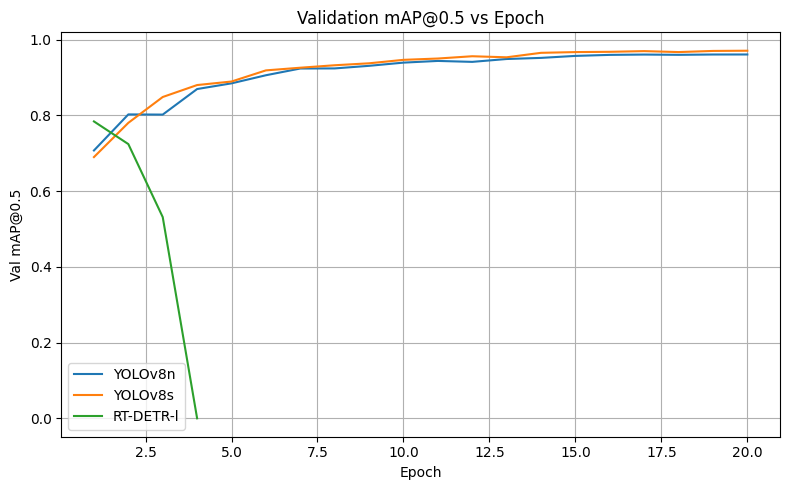

  (No validation loss column found for RT-DETR-l, skipping loss curve)


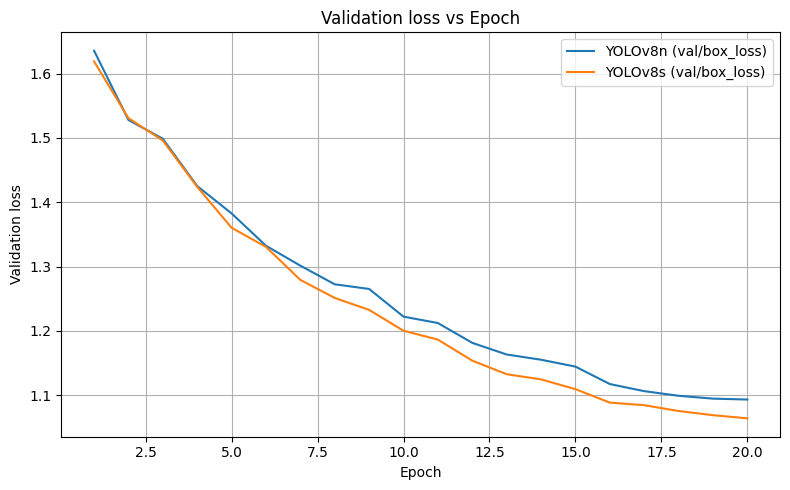

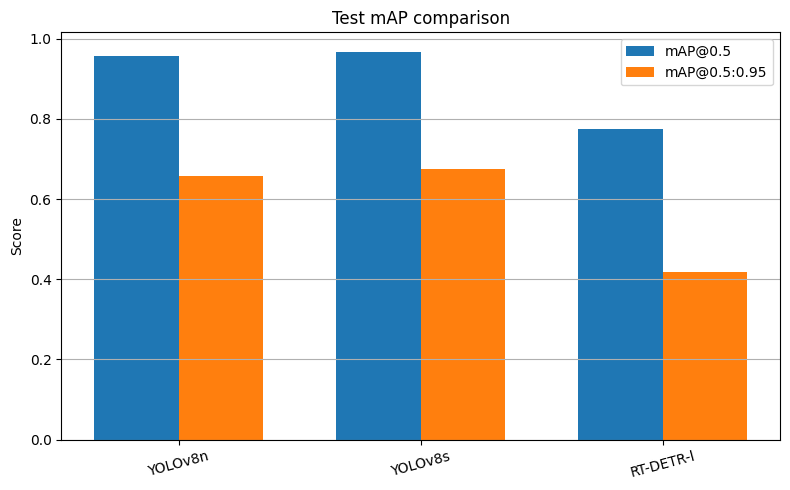

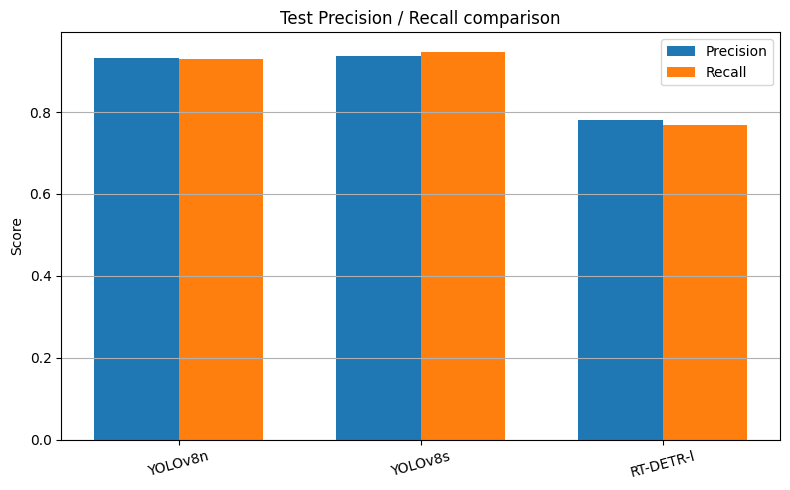

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt

train_histories = {}

for key, info in models_info.items():
    #local results.csv
    candidates = [
        os.path.join(info["local_run_dir"], "results.csv"),
        os.path.join(info["drive_run_dir"], "results.csv"),
    ]
    results_path = next((p for p in candidates if os.path.exists(p)), None)

    if results_path is None:
        print(f"!! No results.csv found for {info['name']}, skipping curves")
        continue

    df = pd.read_csv(results_path)
    train_histories[key] = df
    print(f"\n{info['name']} results.csv loaded from: {results_path}")
    print("Columns:", df.columns.tolist())

#Plot validation mAP@0.5 per epoch for all models ----
plt.figure(figsize=(8, 5))
for key, df in train_histories.items():
    name = models_info[key]["name"]
    if "metrics/mAP50(B)" in df.columns:
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label=name)
    elif "metrics/mAP50" in df.columns:  # fallback if column name changed
        plt.plot(df["epoch"], df["metrics/mAP50"], label=name)
    else:
        print(f"  (No mAP50 column found in {name}, skipping curve)")

plt.xlabel("Epoch")
plt.ylabel("Val mAP@0.5")
plt.title("Validation mAP@0.5 vs Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot validation loss curves
plt.figure(figsize=(8, 5))
for key, df in train_histories.items():
    name = models_info[key]["name"]
    loss_col_candidates = ["val/box_loss", "metrics/loss", "val/loss"]
    loss_col = next((c for c in loss_col_candidates if c in df.columns), None)
    if loss_col is not None:
        plt.plot(df["epoch"], df[loss_col], label=f"{name} ({loss_col})")
    else:
        print(f"  (No validation loss column found for {name}, skipping loss curve)")

plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.title("Validation loss vs Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar chart: Test mAP comparison ----
if not metrics_df.empty:
    plt.figure(figsize=(8, 5))
    x = range(len(metrics_df))
    width = 0.35

    plt.bar([i - width/2 for i in x], metrics_df["mAP50"], width=width, label="mAP@0.5")
    plt.bar([i + width/2 for i in x], metrics_df["mAP50_95"], width=width, label="mAP@0.5:0.95")

    plt.xticks(list(x), metrics_df["model_name"], rotation=15)
    plt.ylabel("Score")
    plt.title("Test mAP comparison")
    plt.legend()
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

#bar chart for Precision & Recall
if not metrics_df.empty:
    plt.figure(figsize=(8, 5))
    x = range(len(metrics_df))
    width = 0.35

    plt.bar([i - width/2 for i in x], metrics_df["precision"], width=width, label="Precision")
    plt.bar([i + width/2 for i in x], metrics_df["recall"], width=width, label="Recall")

    plt.xticks(list(x), metrics_df["model_name"], rotation=15)
    plt.ylabel("Score")
    plt.title("Test Precision / Recall comparison")
    plt.legend()
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()


***Save the metrics summary table to Drive***

In [20]:
summary_path = "/content/drive/MyDrive/drone_project/model_comparison_metrics.csv"
metrics_df.to_csv(summary_path, index=False)
print("Saved model comparison metrics to:", summary_path)
print("\nFinal summary:")
print(metrics_df)


Saved model comparison metrics to: /content/drive/MyDrive/drone_project/model_comparison_metrics.csv

Final summary:
  model_key model_name     mAP50  mAP50_95  precision    recall
0       y8n    YOLOv8n  0.957506  0.656415   0.931470  0.929715
1       y8s    YOLOv8s  0.967646  0.676090   0.936666  0.947364
2    rtdetr  RT-DETR-l  0.774705  0.419011   0.781016  0.767794


## **bYOLO11n as Model 4**

***Train YOLO11n ***

In [21]:
from ultralytics import YOLO
import os

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

print("Using data config:", data_experiment_path)

#Load YOLO11n pretrained model
model_11n = YOLO("yolo11n.pt")

results_11n = model_11n.train(
    data=data_experiment_path,
    epochs=15,
    imgsz=640,
    batch=16,
    project="/content/yolo_drone_runs",
    name="y11n_model",
    pretrained=True,
    device=0,
    workers=2,
    patience=5,                # early stopping
    cos_lr=True
)

print("\nYOLO11n training finished. Results saved in /content/yolo_drone_runs/y11n_model")


Using data config: /content/roboflow_drone_20k/data_experiment.yaml
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/roboflow_drone_20k/data_experiment.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=y11n_model, nbs=64, nms=False, opset=None

***Move YOLO11n results to Google Drive***

In [22]:
import os
import shutil

run_dir_11n = "/content/yolo_drone_runs/y11n_model"

drive_base = "/content/drive/MyDrive/drone_project"
drive_exp_dir_11n = os.path.join(drive_base, "y11n_model")

os.makedirs(drive_exp_dir_11n, exist_ok=True)

print("Run directory (YOLO11n):", run_dir_11n)
print("Drive experiment directory (YOLO11n):", drive_exp_dir_11n)

files_to_copy = [
    "weights/best.pt",
    "weights/last.pt",
    "results.csv",
    "results.png",
    "confusion_matrix.png",
    "PR_curve.png",
    "F1_curve.png",
    "labels_correlogram.jpg"
]

for rel_path in files_to_copy:
    src = os.path.join(run_dir_11n, rel_path)
    if os.path.exists(src):
        dst = os.path.join(drive_exp_dir_11n, os.path.basename(src))
        shutil.copy(src, dst)
        print(f"Copied {src} -> {dst}")
    else:
        print(f"Not found (skipped): {src}")

print("\nFiles now in Drive YOLO11n folder:")
print(os.listdir(drive_exp_dir_11n))


Run directory (YOLO11n): /content/yolo_drone_runs/y11n_model
Drive experiment directory (YOLO11n): /content/drive/MyDrive/drone_project/y11n_model
Copied /content/yolo_drone_runs/y11n_model/weights/best.pt -> /content/drive/MyDrive/drone_project/y11n_model/best.pt
Copied /content/yolo_drone_runs/y11n_model/weights/last.pt -> /content/drive/MyDrive/drone_project/y11n_model/last.pt
Copied /content/yolo_drone_runs/y11n_model/results.csv -> /content/drive/MyDrive/drone_project/y11n_model/results.csv
Copied /content/yolo_drone_runs/y11n_model/results.png -> /content/drive/MyDrive/drone_project/y11n_model/results.png
Copied /content/yolo_drone_runs/y11n_model/confusion_matrix.png -> /content/drive/MyDrive/drone_project/y11n_model/confusion_matrix.png
Not found (skipped): /content/yolo_drone_runs/y11n_model/PR_curve.png
Not found (skipped): /content/yolo_drone_runs/y11n_model/F1_curve.png
Not found (skipped): /content/yolo_drone_runs/y11n_model/labels_correlogram.jpg

Files now in Drive YOLO1

***Evaluate YOLO11n on Test data***

In [23]:
from ultralytics import YOLO
import os

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

run_dir_11n = "/content/yolo_drone_runs/y11n_model"
best_weights_11n = os.path.join(run_dir_11n, "weights", "best.pt")

print("Best weights (YOLO11n) exists?", os.path.exists(best_weights_11n), "->", best_weights_11n)

model_11n = YOLO(best_weights_11n)

metrics_11n_test = model_11n.val(
    data=data_experiment_path,
    split="test",
    imgsz=640,
    batch=32,
    device=0
)

print("\nYOLO11n validation on TEST split complete.")
print("mAP50:", metrics_11n_test.box.map50)
print("mAP50-95:", metrics_11n_test.box.map)
print("Precision:", metrics_11n_test.box.mp)
print("Recall:", metrics_11n_test.box.mr)


Best weights (YOLO11n) exists? True -> /content/yolo_drone_runs/y11n_model/weights/best.pt
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1133.5±401.7 MB/s, size: 47.7 KB)
val: Scanning /content/roboflow_drone_20k/test/labels.cache... 1063 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1063/1063 1.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 34/34 6.3it/s 5.4s
                   all       1063       1124      0.934      0.934      0.956      0.642
Speed: 0.8ms preprocess, 0.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/runs/detect/val7

YOLO11n validation on TEST split complete.
mAP50: 0.9564403344768402
mAP50-95: 0.6424879573008797
Precision: 0.9340331985743439
Recall: 0.9341637010676157


***Full comparison of 4 models (v8n, v8s, RT-DETR-l, 11n)***

In [24]:
#Evaluate all models on Test and build table
import os
import pandas as pd
from ultralytics import YOLO

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

models_info = {
    "y8n": {
        "name": "YOLOv8n",
        "local_run_dir": "/content/yolo_drone_runs/y8n_baseline",
        "drive_run_dir": "/content/drive/MyDrive/drone_project/y8n_baseline",
    },
    "y8s": {
        "name": "YOLOv8s",
        "local_run_dir": "/content/yolo_drone_runs/y8s_model",
        "drive_run_dir": "/content/drive/MyDrive/drone_project/y8s_model",
    },
    "rtdetr": {
        "name": "RT-DETR-l",
        "local_run_dir": "/content/yolo_drone_runs/rtdetr_l_safe",
        "drive_run_dir": "/content/drive/MyDrive/drone_project/rtdetr_l_safe",
    },
    "y11n": {
        "name": "YOLO11n",
        "local_run_dir": "/content/yolo_drone_runs/y11n_model",
        "drive_run_dir": "/content/drive/MyDrive/drone_project/y11n_model",
    },
}

metrics_list = []

for key, info in models_info.items():
    print(f"\n=== Evaluating {info['name']} on TEST split ===")

    candidates = [
        os.path.join(info["local_run_dir"], "weights", "best.pt"),
        os.path.join(info["drive_run_dir"], "best.pt"),
    ]
    best_weights = next((p for p in candidates if os.path.exists(p)), None)

    if best_weights is None:
        print(f"!! No best.pt found for {info['name']}, skipping")
        continue

    print("Using weights:", best_weights)
    model = YOLO(best_weights)

    m = model.val(
        data=data_experiment_path,
        split="test",
        imgsz=640,
        batch=32,
        device=0,
    )

    row = {
        "model_key": key,
        "model_name": info["name"],
        "mAP50": float(m.box.map50),
        "mAP50_95": float(m.box.map),
        "precision": float(m.box.mp),
        "recall": float(m.box.mr),
    }
    metrics_list.append(row)
    print("  mAP50:", row["mAP50"])
    print("  mAP50-95:", row["mAP50_95"])
    print("  Precision:", row["precision"])
    print("  Recall:", row["recall"])

metrics_df = pd.DataFrame(metrics_list)
print("\n=== Summary: Test metrics for all models ===")
print(metrics_df)



=== Evaluating YOLOv8n on TEST split ===
Using weights: /content/yolo_drone_runs/y8n_baseline/weights/best.pt
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1433.6±665.6 MB/s, size: 52.3 KB)
val: Scanning /content/roboflow_drone_20k/test/labels.cache... 1063 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1063/1063 1.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 34/34 6.4it/s 5.3s
                   all       1063       1124      0.931       0.93      0.958      0.656
Speed: 0.8ms preprocess, 0.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/runs/detect/val8
  mAP50: 0.9575056386822426
  mAP50-95: 0.6564146822987531
  Precision: 0.9314695655130764
  Recall: 0.9297153024911032

=== Evaluating YOLOv8s 

***Load results.csv, plot curves and bar charts***


YOLOv8n results.csv loaded from: /content/yolo_drone_runs/y8n_baseline/results.csv
Columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

YOLOv8s results.csv loaded from: /content/yolo_drone_runs/y8s_model/results.csv
Columns: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

RT-DETR-l results.csv loaded from: /content/yolo_drone_runs/rtdetr_l_safe/results.csv
Columns: ['epoch', 'time', 'train/giou_loss', 'train/cls_loss', 'train/l1_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/giou_loss', 'val/cls_loss', 'val/l1_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

YOLO11

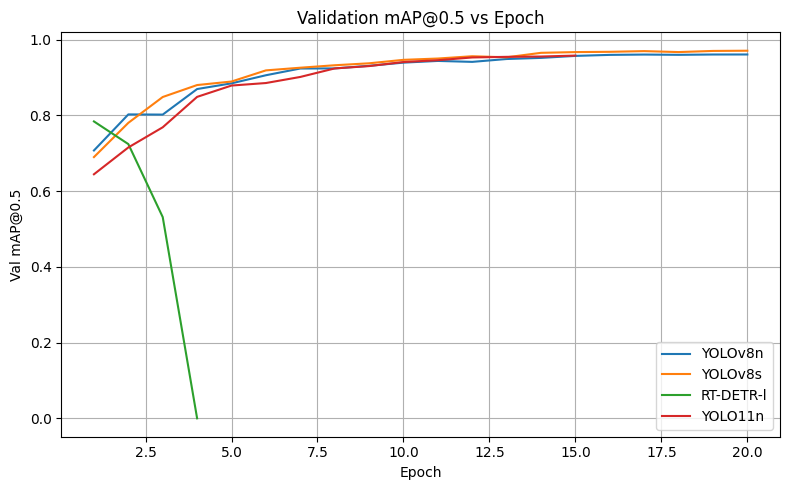

  (No validation loss column for RT-DETR-l, skipping loss curve)


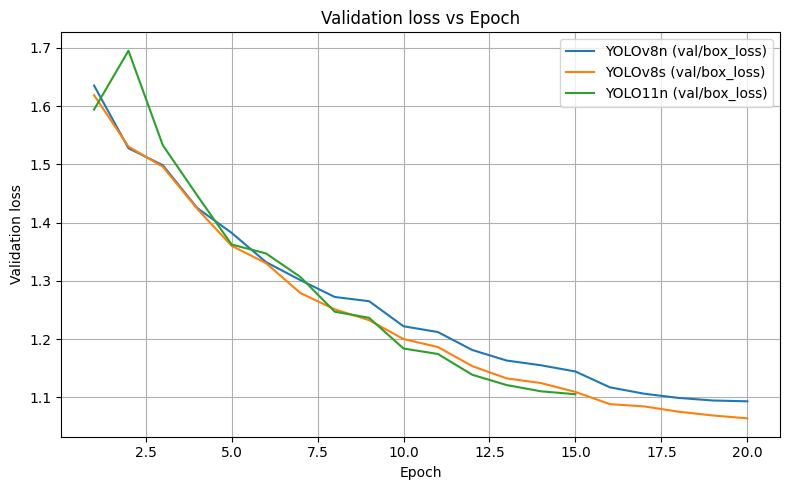

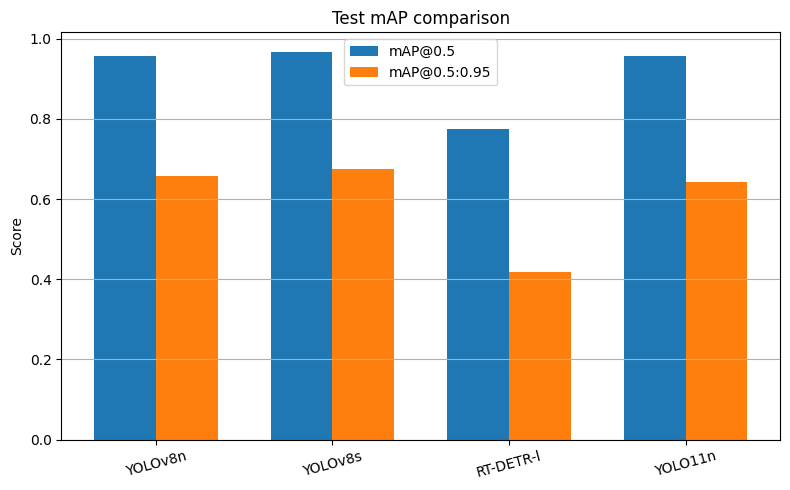

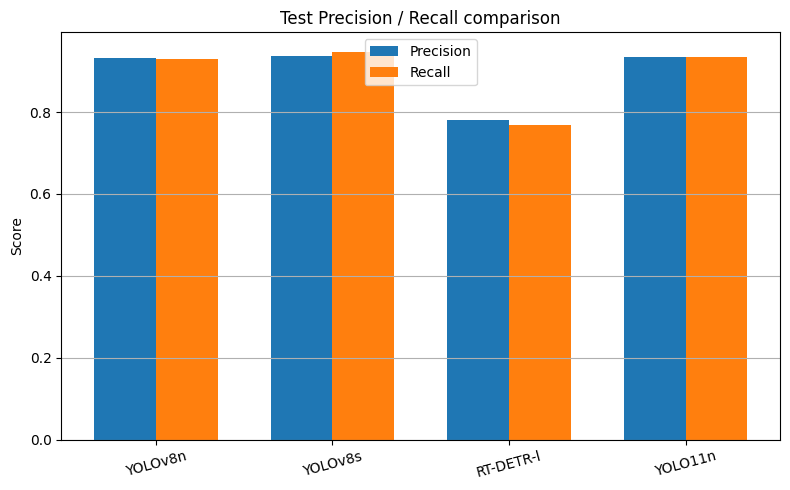

In [25]:
import matplotlib.pyplot as plt

train_histories = {}

for key, info in models_info.items():
    candidates = [
        os.path.join(info["local_run_dir"], "results.csv"),
        os.path.join(info["drive_run_dir"], "results.csv"),
    ]
    results_path = next((p for p in candidates if os.path.exists(p)), None)

    if results_path is None:
        print(f"!! No results.csv found for {info['name']}, skipping curves")
        continue

    df = pd.read_csv(results_path)
    train_histories[key] = df
    print(f"\n{info['name']} results.csv loaded from: {results_path}")
    print("Columns:", df.columns.tolist())

# mAP@0.5 vs epoch ----
plt.figure(figsize=(8, 5))
for key, df in train_histories.items():
    name = models_info[key]["name"]
    if "metrics/mAP50(B)" in df.columns:
        plt.plot(df["epoch"], df["metrics/mAP50(B)"], label=name)
    elif "metrics/mAP50" in df.columns:
        plt.plot(df["epoch"], df["metrics/mAP50"], label=name)
    else:
        print(f"  (No mAP50 column for {name}, skipping curve)")

plt.xlabel("Epoch")
plt.ylabel("Val mAP@0.5")
plt.title("Validation mAP@0.5 vs Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Validation loss vs epoch
plt.figure(figsize=(8, 5))
for key, df in train_histories.items():
    name = models_info[key]["name"]
    loss_col_candidates = ["val/box_loss", "metrics/loss", "val/loss"]
    loss_col = next((c for c in loss_col_candidates if c in df.columns), None)
    if loss_col is not None:
        plt.plot(df["epoch"], df[loss_col], label=f"{name} ({loss_col})")
    else:
        print(f"  (No validation loss column for {name}, skipping loss curve)")

plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.title("Validation loss vs Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar chart: Test mAP
if not metrics_df.empty:
    plt.figure(figsize=(8, 5))
    x = range(len(metrics_df))
    width = 0.35

    plt.bar([i - width/2 for i in x], metrics_df["mAP50"], width=width, label="mAP@0.5")
    plt.bar([i + width/2 for i in x], metrics_df["mAP50_95"], width=width, label="mAP@0.5:0.95")

    plt.xticks(list(x), metrics_df["model_name"], rotation=15)
    plt.ylabel("Score")
    plt.title("Test mAP comparison")
    plt.legend()
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

# Bar chart: Precision & Recall
if not metrics_df.empty:
    plt.figure(figsize=(8, 5))
    x = range(len(metrics_df))
    width = 0.35

    plt.bar([i - width/2 for i in x], metrics_df["precision"], width=width, label="Precision")
    plt.bar([i + width/2 for i in x], metrics_df["recall"], width=width, label="Recall")

    plt.xticks(list(x), metrics_df["model_name"], rotation=15)
    plt.ylabel("Score")
    plt.title("Test Precision / Recall comparison")
    plt.legend()
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()


***Save updated comparison table to Drive***

In [26]:
summary_path = "/content/drive/MyDrive/drone_project/model_comparison_metrics_with_y11n.csv"
metrics_df.to_csv(summary_path, index=False)
print("Saved extended model comparison metrics to:", summary_path)
print("\nFinal summary:")
print(metrics_df)


Saved extended model comparison metrics to: /content/drive/MyDrive/drone_project/model_comparison_metrics_with_y11n.csv

Final summary:
  model_key model_name     mAP50  mAP50_95  precision    recall
0       y8n    YOLOv8n  0.957506  0.656415   0.931470  0.929715
1       y8s    YOLOv8s  0.967646  0.676090   0.936666  0.947364
2    rtdetr  RT-DETR-l  0.774705  0.419011   0.781016  0.767794
3      y11n    YOLO11n  0.956440  0.642488   0.934033  0.934164


In [27]:
from ultralytics import YOLO
import os

base_dir = "/content/roboflow_drone_20k"
data_experiment_path = f"{base_dir}/data_experiment.yaml"

best_weights_y8s = "/content/yolo_drone_runs/y8s_model/weights/best.pt"  # example
model = YOLO(best_weights_y8s)

metrics_val = model.val(
    data=data_experiment_path,
    split="val",   # <- this uses the validation set
    imgsz=640,
    batch=32,
    device=0
)

print("Val mAP50:", metrics_val.box.map50)
print("Val mAP50-95:", metrics_val.box.map)
print("Val Precision:", metrics_val.box.mp)
print("Val Recall:", metrics_val.box.mr)


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81222MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1071.8±512.5 MB/s, size: 26.8 KB)
val: Scanning /content/roboflow_drone_20k/valid/labels.cache... 1679 images, 3 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1679/1679 2.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 53/53 6.4it/s 8.3s
                   all       1679       1795      0.947      0.942      0.971      0.695
Speed: 0.6ms preprocess, 1.0ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /content/runs/detect/val12
Val mAP50: 0.9708312112603534
Val mAP50-95: 0.6950001694316071
Val Precision: 0.9473253896873348
Val Recall: 0.9418056299172427
